# TIME SERIES ANALYSIS-BASED PREDICTION OF DENGUE SPREAD USING CLIMATE DATA

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor
import xgboost
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
%matplotlib inline

In [3]:
features_train = pd.read_csv('dengue_features_train.csv')
labels_train = pd.read_csv('dengue_labels_train.csv')
features_test = pd.read_csv('dengue_features_test.csv')

In [4]:
features_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [5]:
labels_train

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [6]:
features_train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [7]:
features = list(features_train)
label = ['total_cases']

In [8]:
df = features_train.merge(labels_train, how='left', left_on=['city', 'year','weekofyear'], right_on = ['city', 'year','weekofyear'])
DATA = df.copy()  
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


# Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [10]:
df.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000


In [11]:
df_iq = df[df['city']=='iq'].sort_values(by=['week_start_date'])
df_sj = df[df['city']=='sj'].sort_values(by=['week_start_date'])

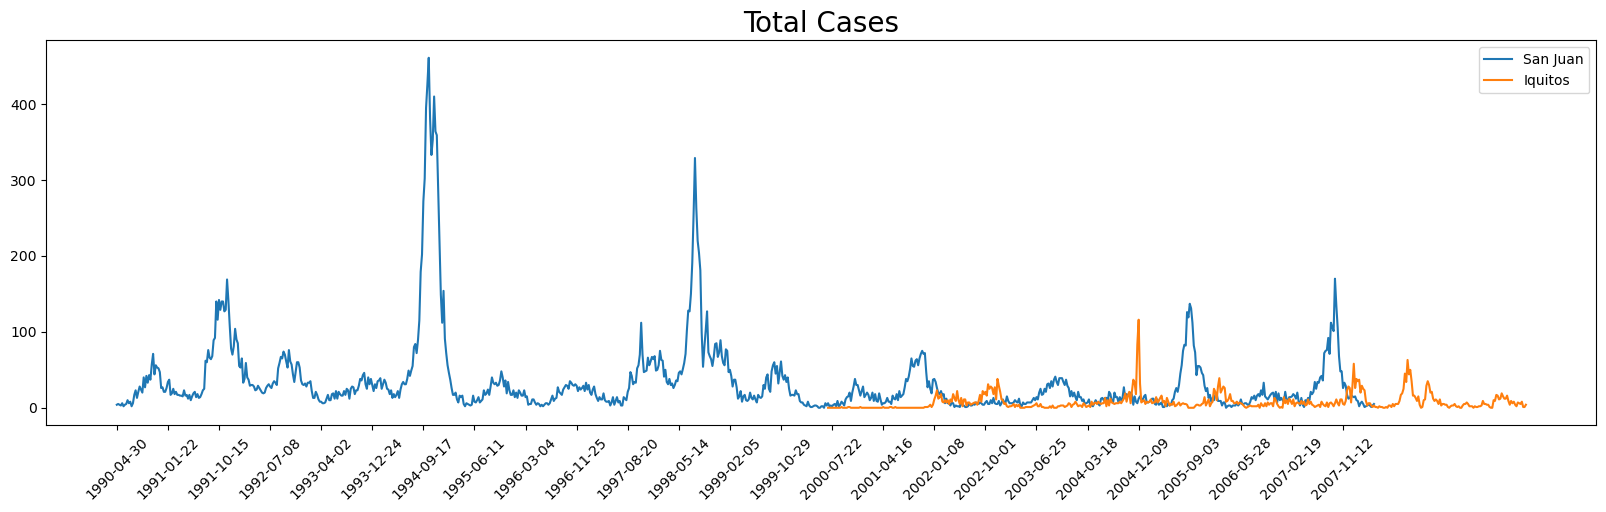

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(df_sj['week_start_date'], df_sj["total_cases"], label='San Juan')
plt.plot(df_iq['week_start_date'], df_iq["total_cases"], label='Iquitos')
plt.xticks(df_sj['week_start_date'], rotation=45)
plt.locator_params(axis='x', nbins=25)
plt.title("Total Cases", size=20)
plt.legend()
plt.show()

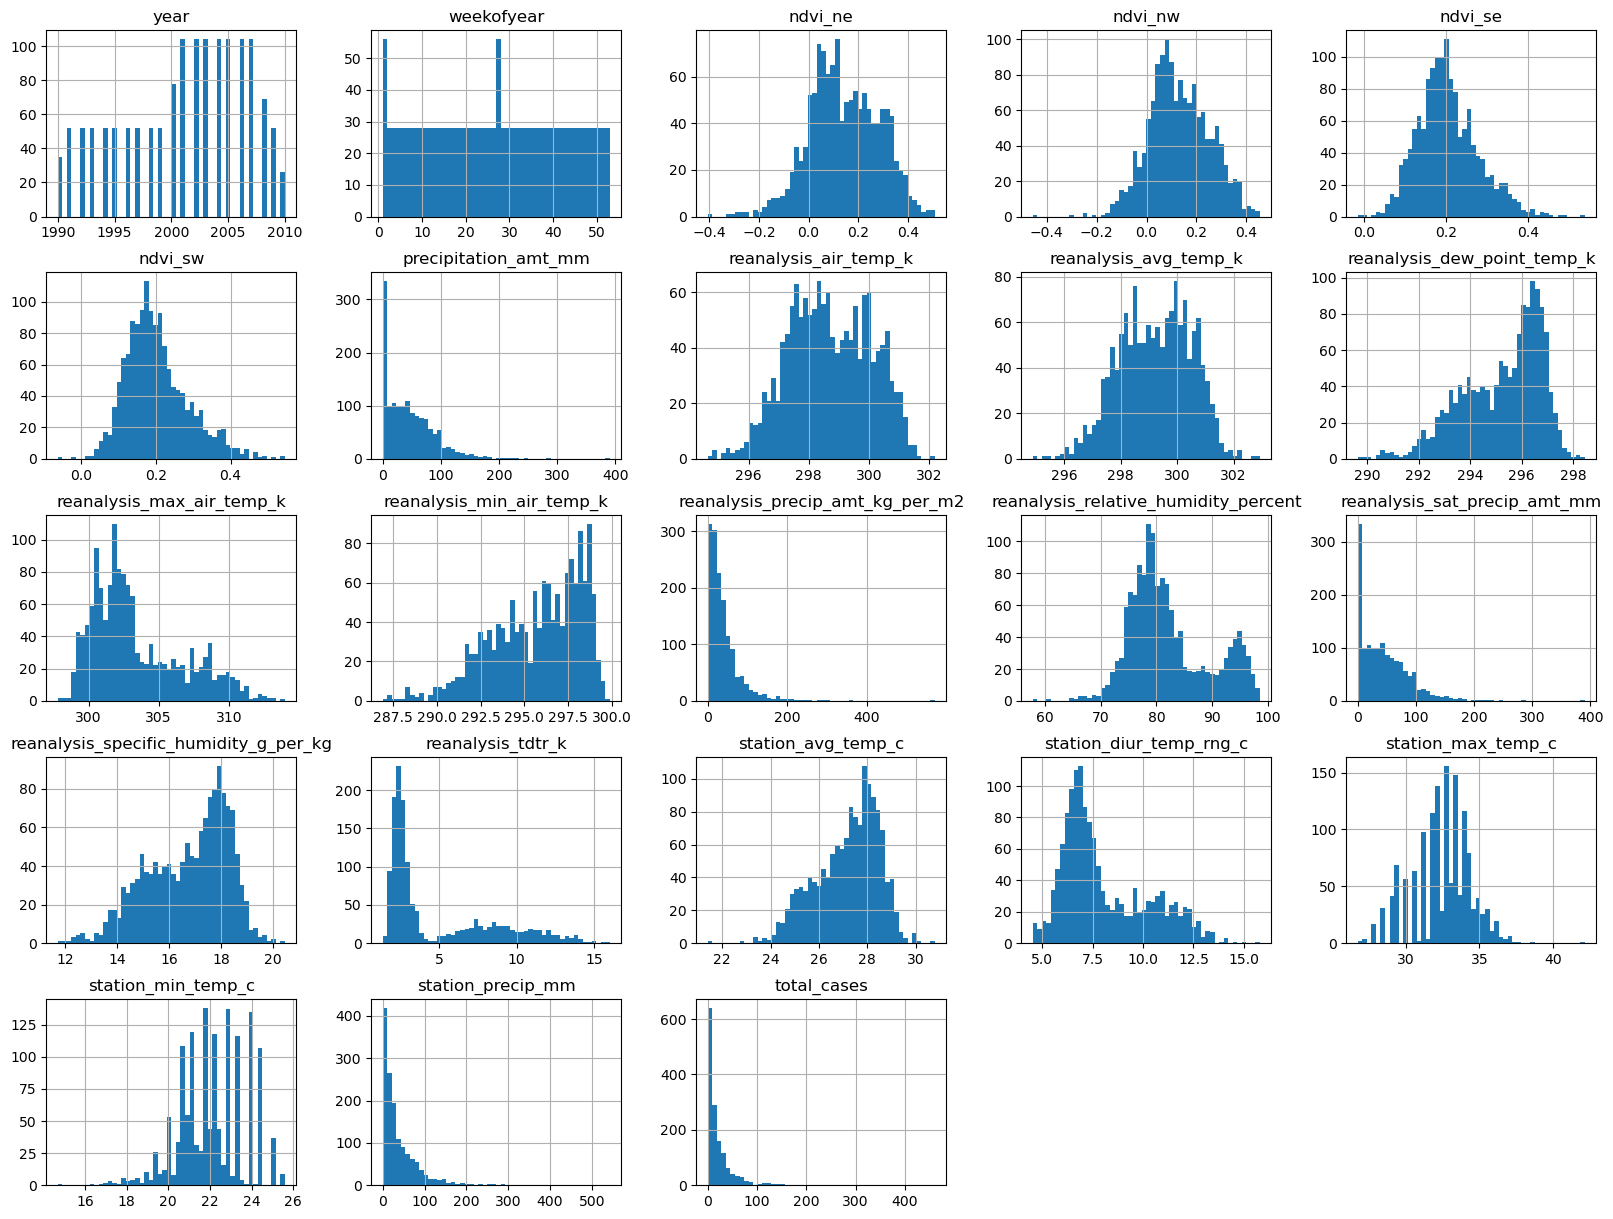

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
week = df[df["weekofyear"]==1][["city","year","weekofyear","week_start_date"]]
print(len(week))

28


In [15]:
week = df[df["weekofyear"]==2][["city","year","weekofyear","week_start_date"]]
print(len(week))

28


In [16]:
week = df[df["weekofyear"]==0][["city","year","weekofyear","week_start_date"]]
print(len(week))

0


In [17]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [18]:
#We create a dataframe with all the numerical data (without city, or week_start_date)
df_num = df.drop(['city', 'week_start_date'], axis=1)
features_test_num = features_test.drop(['city', 'week_start_date'], axis=1)

features_test_cols = features_test.columns
features_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [19]:
#We fill the NaNs with a KNN:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

features_cols_num = features_test_num.columns
features_test_num_treated = imputer.fit_transform(features_test_num)
features_test_num_treated = pd.DataFrame(features_test_num_treated, columns = features_cols_num)

df_num_treated = imputer.fit_transform(df_num)
df_num_treated = pd.DataFrame(df_num_treated, columns = df_num.columns)
df_num_treated.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [20]:
#We add the non-numeric columns city and week_start_date
dffffff = pd.concat([df_num_treated, df[['city', 'week_start_date']] ], axis=1)
features_test = pd.concat([features_test_num_treated, features_test[['city', 'week_start_date']] ], axis=1)

#reorder columns as before
df = dffffff[df.columns]
features_test = features_test[features_test_cols]
features_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008.0,18.0,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008.0,19.0,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008.0,20.0,2008-05-13,-0.001500,-0.023263,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008.0,21.0,2008-05-20,-0.018760,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008.0,22.0,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013.0,22.0,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013.0,23.0,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013.0,24.0,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013.0,25.0,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [21]:
cols = list(df)
cols

['city',
 'year',
 'weekofyear',
 'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

In [22]:
cols = list(df)
cols.insert(3, "NDVI")
df["NDVI"] = df[["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"]].mean(axis=1)
df = df[cols]
df = df.drop(["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"], axis=1)
df.head()

,city,year,weekofyear,NDVI,week_start_date,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990.0,18.0,0.150606,1990-04-30,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,sj,1990.0,19.0,0.157479,1990-05-07,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,sj,1990.0,20.0,0.133315,1990-05-14,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,sj,1990.0,21.0,0.209286,1990-05-21,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,sj,1990.0,22.0,0.239235,1990-05-28,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [23]:
cols = list(features_test)
cols.insert(3, "NDVI")
features_test["NDVI"] = features_test[["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"]].mean(axis=1)
features_test = features_test[cols]
features_test = features_test.drop(["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"], axis=1)
features_test.head()

,city,year,weekofyear,NDVI,week_start_date,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008.0,18.0,0.039032,2008-04-29,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008.0,19.0,0.030989,2008-05-06,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008.0,20.0,0.054462,2008-05-13,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008.0,21.0,0.052847,2008-05-20,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008.0,22.0,0.058704,2008-05-27,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [24]:
df = df.drop(['reanalysis_dew_point_temp_k'], axis=1)

In [25]:
#
replace_dict = {'city': {'iq': 0, 'sj': 1}}
features_test.replace(replace_dict, inplace=True)
df.replace(replace_dict, inplace=True)
df.head()

,city,year,weekofyear,NDVI,week_start_date,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990.0,18.0,0.150606,1990-04-30,12.42,297.572857,297.742857,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,1,1990.0,19.0,0.157479,1990-05-07,22.82,298.211429,298.442857,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,1,1990.0,20.0,0.133315,1990-05-14,34.54,298.781429,298.878571,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,1,1990.0,21.0,0.209286,1990-05-21,15.36,298.987143,299.228571,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,1,1990.0,22.0,0.239235,1990-05-28,7.52,299.518571,299.664286,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0


In [26]:
years_sj = df[df['city']==1.0]['year'].astype('category').cat.categories.tolist()
years_iq = df[df['city']==0.0]['year'].astype('category').cat.categories.tolist()

In [27]:
years_sj

[1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0]

In [28]:
years_iq


[2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0]

In [29]:
n_iq = 7 #7 out of 12 first years
n_sj = 14 # first 14 out of 19 years

#Train
train_iq = df[(df['city']==0.0) & ( df['year'].isin(years_iq[:n_iq]))]
train_sj = df[(df['city']==1.0) & ( df['year'].isin(years_sj[:n_sj]))]
X_train = pd.concat([train_iq, train_sj]).drop(['total_cases'], axis=1)
y_train = pd.concat([train_iq, train_sj])[['total_cases']]

#Test
test_iq = df[(df['city']==0.0) & ( df['year'].isin(years_iq[n_iq:]))]
test_sj = df[(df['city']==1.0) & ( df['year'].isin(years_sj[n_sj:]))]
X_test = pd.concat([test_iq, test_sj]).drop(['total_cases'], axis=1)
y_test = pd.concat([test_iq, test_sj])[['total_cases']]

In [30]:
y_train

,total_cases
936,0.0
937,0.0
938,0.0
939,0.0
940,0.0
...,...
706,37.0
707,29.0
708,26.0
709,15.0


In [31]:
train_sj

,city,year,weekofyear,NDVI,week_start_date,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,1990.0,18.0,0.150606,1990-04-30,12.42,297.572857,297.742857,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0
1,1,1990.0,19.0,0.157479,1990-05-07,22.82,298.211429,298.442857,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0
2,1,1990.0,20.0,0.133315,1990-05-14,34.54,298.781429,298.878571,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0
3,1,1990.0,21.0,0.209286,1990-05-21,15.36,298.987143,299.228571,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0
4,1,1990.0,22.0,0.239235,1990-05-28,7.52,299.518571,299.664286,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,1,2003.0,48.0,0.084369,2003-11-26,16.20,298.814286,298.907143,301.0,297.2,38.70,83.410000,16.20,17.227143,2.357143,25.971429,6.114286,30.6,22.8,54.2,37.0
707,1,2003.0,49.0,0.073851,2003-12-03,0.00,299.107143,299.242857,300.7,297.4,10.26,77.308571,0.00,16.204286,1.942857,26.185714,5.614286,29.4,21.7,2.1,29.0
708,1,2003.0,50.0,-0.007986,2003-12-10,182.81,299.174286,299.185714,301.5,297.5,50.60,78.232857,182.81,16.468571,2.142857,25.642857,5.014286,29.4,22.2,82.8,26.0
709,1,2003.0,51.0,0.099544,2003-12-17,0.00,298.555714,298.607143,300.5,296.9,12.28,80.797143,0.00,16.390000,2.157143,25.842857,5.414286,29.4,22.2,11.0,15.0


In [32]:
train_iq

,city,year,weekofyear,NDVI,week_start_date,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,0,2000.0,26.0,0.228307,2000-07-01,25.41,296.740000,298.450000,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.70,3.00,0.0
937,0,2000.0,27.0,0.256012,2000-07-08,60.61,296.634286,298.428571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.80,55.60,0.0
938,0,2000.0,28.0,0.170504,2000-07-15,55.52,296.415714,297.392857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.70,38.10,0.0
939,0,2000.0,29.0,0.206918,2000-07-22,5.60,295.357143,296.228571,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.70,30.00,0.0
940,0,2000.0,30.0,0.316546,2000-07-29,62.76,296.432857,297.635714,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.10,4.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,0,2006.0,47.0,0.319482,2006-11-26,43.59,298.098571,299.557143,307.3,294.7,61.43,94.302857,43.59,18.638571,7.371429,27.000000,9.000000,32.3,22.50,205.30,10.0
1270,0,2006.0,48.0,0.162593,2006-12-03,75.33,299.197143,300.935714,309.1,294.0,61.28,89.550000,75.33,18.744286,10.757143,27.900000,9.033333,34.9,22.90,115.10,5.0
1271,0,2006.0,49.0,0.379192,2006-12-10,99.89,298.202857,299.200000,304.6,294.6,95.02,96.795714,99.89,19.425714,6.914286,28.400000,8.800000,33.7,23.20,10.90,2.0
1272,0,2006.0,50.0,0.361137,2006-12-17,157.75,298.158571,299.071429,304.4,294.2,63.00,95.875714,157.75,19.111429,6.400000,27.306571,9.649857,33.8,21.56,100.86,0.0


In [33]:
X_test 

,city,year,weekofyear,NDVI,week_start_date,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1274,0,2007.0,1.0,0.175511,2007-01-01,79.94,297.288571,298.207143,306.3,293.2,88.90,95.927143,79.94,18.144286,7.414286,26.600000,7.950000,31.9,21.5,133.4
1275,0,2007.0,2.0,0.188119,2007-01-08,37.06,297.104286,298.578571,304.6,294.6,144.59,96.238571,37.06,17.962857,6.728571,26.825000,7.725000,31.7,22.9,61.5
1276,0,2007.0,3.0,0.256854,2007-01-15,126.89,297.387143,298.435714,305.5,293.3,52.20,94.647143,126.89,17.975714,7.042857,27.775000,9.550000,33.4,22.2,178.0
1277,0,2007.0,4.0,0.225475,2007-01-22,95.47,297.614286,298.450000,303.7,294.9,180.99,96.997143,95.47,18.688571,5.528571,27.700000,9.120000,33.6,22.0,149.9
1278,0,2007.0,5.0,0.178575,2007-01-29,83.70,298.144286,299.614286,307.8,294.3,65.10,93.135714,83.70,18.414286,9.000000,27.725000,10.300000,35.0,22.3,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1,2008.0,13.0,0.161166,2008-03-25,27.19,296.958571,296.957143,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,1,2008.0,14.0,0.032731,2008-04-01,3.82,298.081429,298.228571,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,1,2008.0,15.0,0.017755,2008-04-08,16.96,297.460000,297.564286,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,1,2008.0,16.0,0.104531,2008-04-15,0.00,297.630000,297.778571,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2


In [34]:
y_train

,total_cases
936,0.0
937,0.0
938,0.0
939,0.0
940,0.0
...,...
706,37.0
707,29.0
708,26.0
709,15.0


In [35]:
X_test_copy = X_test.copy() #We keep the week_start_date for the visualization of the results
X_train = X_train.drop(['week_start_date'], axis=1)
X_test = X_test.drop(['week_start_date'], axis=1)

In [36]:
X_train = X_train.drop(['year'], axis=1)
X_test = X_test.drop(['year'], axis=1)

In [37]:
X_test

,city,weekofyear,NDVI,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1274,0,1.0,0.175511,79.94,297.288571,298.207143,306.3,293.2,88.90,95.927143,79.94,18.144286,7.414286,26.600000,7.950000,31.9,21.5,133.4
1275,0,2.0,0.188119,37.06,297.104286,298.578571,304.6,294.6,144.59,96.238571,37.06,17.962857,6.728571,26.825000,7.725000,31.7,22.9,61.5
1276,0,3.0,0.256854,126.89,297.387143,298.435714,305.5,293.3,52.20,94.647143,126.89,17.975714,7.042857,27.775000,9.550000,33.4,22.2,178.0
1277,0,4.0,0.225475,95.47,297.614286,298.450000,303.7,294.9,180.99,96.997143,95.47,18.688571,5.528571,27.700000,9.120000,33.6,22.0,149.9
1278,0,5.0,0.178575,83.70,298.144286,299.614286,307.8,294.3,65.10,93.135714,83.70,18.414286,9.000000,27.725000,10.300000,35.0,22.3,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1,13.0,0.161166,27.19,296.958571,296.957143,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,1,14.0,0.032731,3.82,298.081429,298.228571,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,1,15.0,0.017755,16.96,297.460000,297.564286,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,1,16.0,0.104531,0.00,297.630000,297.778571,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2


In [38]:
X_train

,city,weekofyear,NDVI,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,0,26.0,0.228307,25.41,296.740000,298.450000,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,0,27.0,0.256012,60.61,296.634286,298.428571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,0,28.0,0.170504,55.52,296.415714,297.392857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,0,29.0,0.206918,5.60,295.357143,296.228571,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,0,30.0,0.316546,62.76,296.432857,297.635714,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,1,48.0,0.084369,16.20,298.814286,298.907143,301.0,297.2,38.70,83.410000,16.20,17.227143,2.357143,25.971429,6.114286,30.6,22.8,54.2
707,1,49.0,0.073851,0.00,299.107143,299.242857,300.7,297.4,10.26,77.308571,0.00,16.204286,1.942857,26.185714,5.614286,29.4,21.7,2.1
708,1,50.0,-0.007986,182.81,299.174286,299.185714,301.5,297.5,50.60,78.232857,182.81,16.468571,2.142857,25.642857,5.014286,29.4,22.2,82.8
709,1,51.0,0.099544,0.00,298.555714,298.607143,300.5,296.9,12.28,80.797143,0.00,16.390000,2.157143,25.842857,5.414286,29.4,22.2,11.0


In [39]:
y_test

,total_cases
1274,0.0
1275,14.0
1276,6.0
1277,10.0
1278,5.0
...,...
931,4.0
932,3.0
933,1.0
934,3.0


In [40]:
X_train

,city,weekofyear,NDVI,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,0,26.0,0.228307,25.41,296.740000,298.450000,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,0,27.0,0.256012,60.61,296.634286,298.428571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,0,28.0,0.170504,55.52,296.415714,297.392857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,0,29.0,0.206918,5.60,295.357143,296.228571,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,0,30.0,0.316546,62.76,296.432857,297.635714,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,1,48.0,0.084369,16.20,298.814286,298.907143,301.0,297.2,38.70,83.410000,16.20,17.227143,2.357143,25.971429,6.114286,30.6,22.8,54.2
707,1,49.0,0.073851,0.00,299.107143,299.242857,300.7,297.4,10.26,77.308571,0.00,16.204286,1.942857,26.185714,5.614286,29.4,21.7,2.1
708,1,50.0,-0.007986,182.81,299.174286,299.185714,301.5,297.5,50.60,78.232857,182.81,16.468571,2.142857,25.642857,5.014286,29.4,22.2,82.8
709,1,51.0,0.099544,0.00,298.555714,298.607143,300.5,296.9,12.28,80.797143,0.00,16.390000,2.157143,25.842857,5.414286,29.4,22.2,11.0


In [41]:
 y_train

,total_cases
936,0.0
937,0.0
938,0.0
939,0.0
940,0.0
...,...
706,37.0
707,29.0
708,26.0
709,15.0


In [42]:
xgb = xgboost.XGBRegressor(n_estimator =120,max_depth=215,verbosity=1,learning_rate=1,booster='dart',importance_type='cover')

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


[14:46:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_estimator" } are not used.



In [43]:
y_pred

array([ 1.01354866e+01,  1.91182652e+01,  2.43310528e+01,  9.20775604e+00,
        5.72163200e+00, -1.32944733e-01,  6.03613281e+00,  4.23517799e+00,
        1.08833289e+00,  9.06273460e+00,  4.02968550e+00,  8.94266069e-02,
        2.24164200e+01,  9.76203346e+00,  2.26288414e+00,  5.92622995e+00,
        4.94539547e+00,  2.23825836e+00,  3.89256620e+00,  5.28949738e+00,
        3.29860449e+00,  1.35699201e+00,  5.93079948e+00,  1.19724274e-02,
        1.05149345e+01,  9.61808395e+00,  5.36048472e-01,  1.14631653e-03,
        2.60526276e+00,  1.38944507e+00,  2.37989664e+00,  1.06351280e+00,
        6.12015629e+00,  3.00832224e+00,  5.97115993e+00,  3.27470255e+00,
       -6.03444874e-01, -2.89146602e-02,  7.54377007e-01,  1.39690781e+01,
        1.65688610e+01,  1.03263130e+01,  2.45694542e+00,  2.06438103e+01,
        6.10301638e+00,  1.39541841e+00,  7.96872330e+00,  6.36747885e+00,
        9.03223228e+00,  2.63439522e+01,  3.19781929e-01,  6.84628534e+00,
        2.28004665e+01,  

In [44]:
y_pred = np.rint(y_pred)
y_pred

array([ 10.,  19.,  24.,   9.,   6.,  -0.,   6.,   4.,   1.,   9.,   4.,
         0.,  22.,  10.,   2.,   6.,   5.,   2.,   4.,   5.,   3.,   1.,
         6.,   0.,  11.,  10.,   1.,   0.,   3.,   1.,   2.,   1.,   6.,
         3.,   6.,   3.,  -1.,  -0.,   1.,  14.,  17.,  10.,   2.,  21.,
         6.,   1.,   8.,   6.,   9.,  26.,   0.,   7.,  23.,   5.,  14.,
        14.,  19.,  24.,  26.,  24.,  16.,   1.,   9.,   6.,   5.,   8.,
         9.,   5.,  21.,   7.,   7.,  12.,   7.,   0.,   8.,   2.,   4.,
         4.,   1.,   6.,   1.,   1.,   1.,  -0.,   4.,  22.,   0.,  -0.,
         5.,  -0.,  -0.,   3.,   6.,   1.,  21.,  23.,   4.,  -0.,   4.,
         1.,  23.,   8.,  21.,   2.,   2.,   6.,  19.,  20.,  11.,  10.,
        12.,   4.,   9.,  -1.,   7.,  12.,  19.,  12.,   0.,   0.,   2.,
         7.,   3.,   3.,   2.,   2.,  -0.,   1.,   0.,   4.,   3.,   1.,
         1.,   0.,   5.,  19.,  -0.,  18.,  -4.,  20.,  18.,   1.,   5.,
        22.,   2.,   3.,  19.,  -0.,  -2.,   5.,  1

In [45]:
score = mean_absolute_error(y_test, y_pred)
score

17.64864864864865

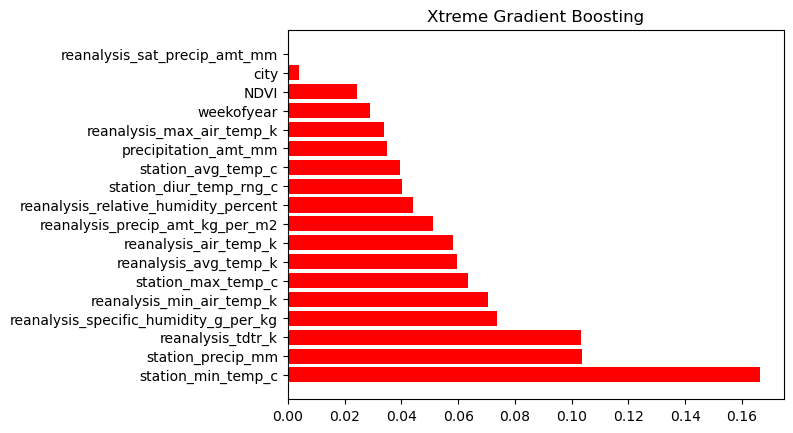

In [46]:
importances = xgb.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange features names so they match the sorted feature importances
names = [list(X_train)[i] for i in indices]

# Create plot
plt.figure()
plt.title("Xtreme Gradient Boosting")
plt.barh(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.yticks(range(X_train.shape[1]), names)

# Show plot
plt.show()

In [47]:
y_pred = pd.DataFrame(y_pred, index=X_test.index, columns=["pred_cases"])
y_pred = pd.concat([X_test_copy[['city', 'week_start_date']], y_pred], axis=1)
y_test = pd.concat([X_test_copy[['city', 'week_start_date']], y_test], axis=1)

In [48]:
y_test_iq = y_test[y_test["city"]==0]
y_pred_iq = y_pred[y_pred["city"]==0]
y_test_sj = y_test[y_test["city"]==1]
y_pred_sj = y_pred[y_pred["city"]==1]

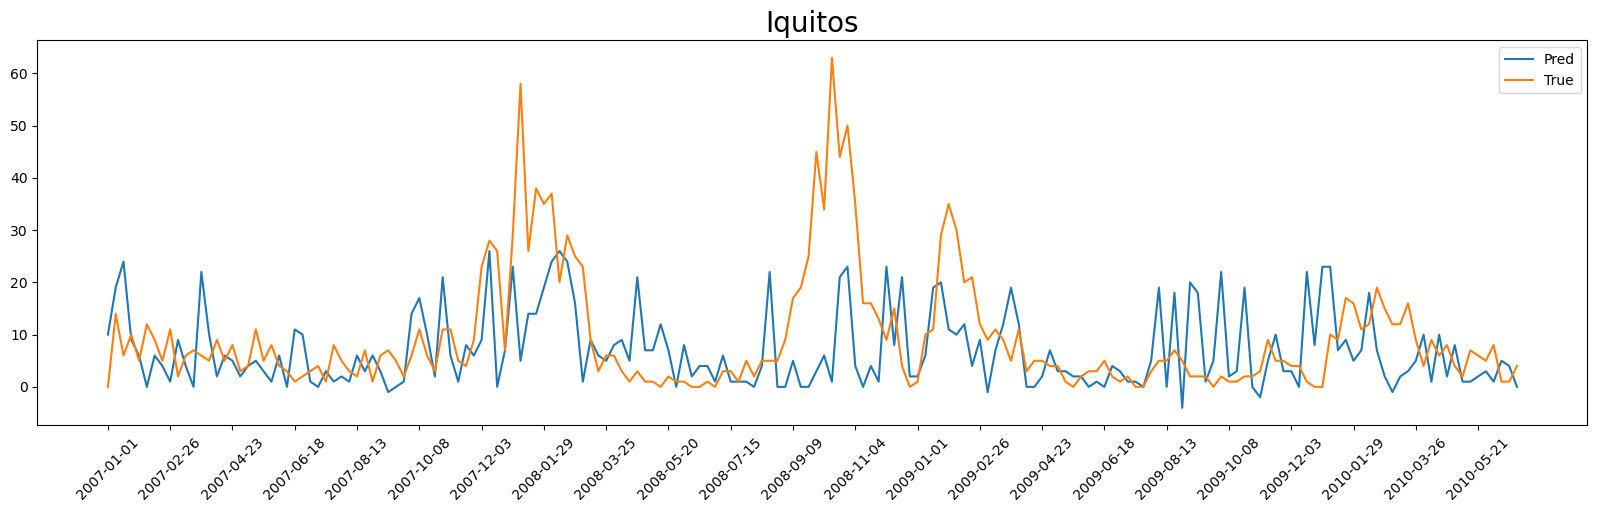

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(y_pred_iq['week_start_date'], y_pred_iq["pred_cases"], label='Pred')
plt.plot(y_test_iq['week_start_date'], y_test_iq["total_cases"], label='True')
plt.xticks(y_pred_iq['week_start_date'], rotation=45)
plt.locator_params(axis='x', nbins=25)
plt.title("Iquitos", size=20)
plt.legend()
plt.show()

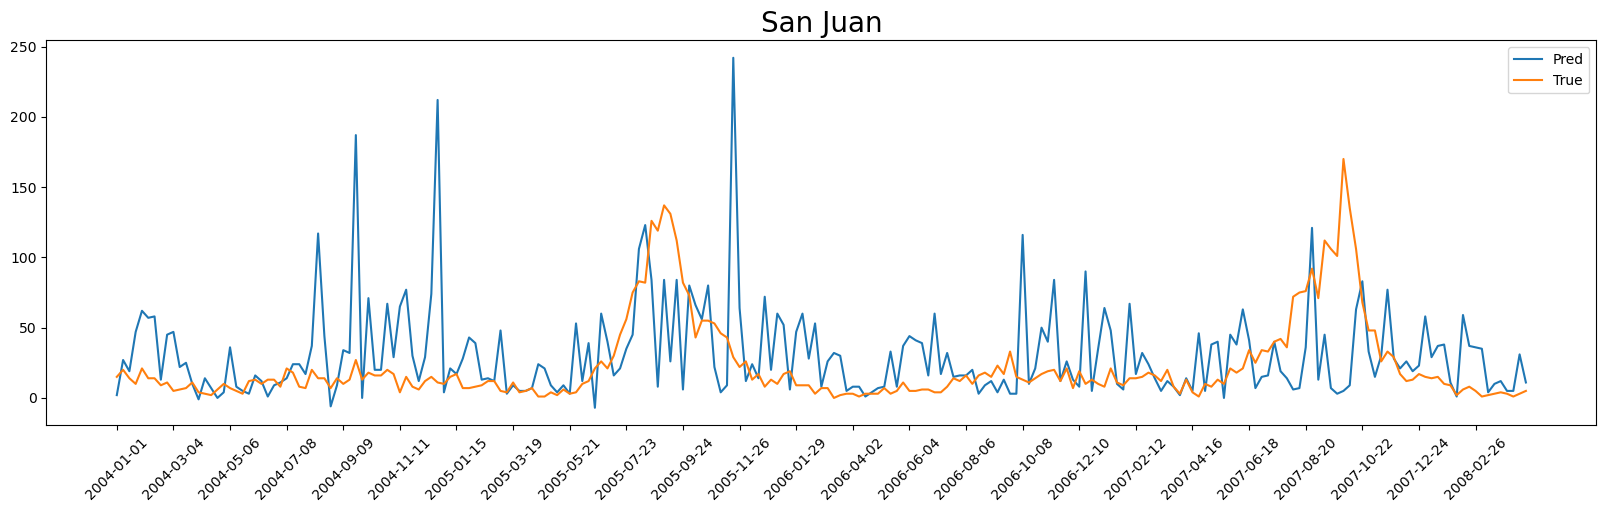

In [50]:
plt.figure(figsize=(20, 5))
plt.plot(y_pred_sj['week_start_date'], y_pred_sj["pred_cases"], label='Pred')
plt.plot(y_test_sj['week_start_date'], y_test_sj["total_cases"], label='True')
plt.xticks(y_pred_sj['week_start_date'], rotation=45)
plt.locator_params(axis='x', nbins=25)
plt.title("San Juan", size=20)
plt.legend()
plt.show()

In [51]:
features_test_iq = features_test[features_test['city']==0]
features_test_sj = features_test[features_test['city']==1]

In [52]:
#Prediction to send
submission = xgb.predict(features_test.drop(['year', 'reanalysis_dew_point_temp_k', "week_start_date"], axis=1))

#Proper formatting
submission = pd.DataFrame(submission, columns=['total_cases'])
submission = pd.concat([features_test[['city', 'year', 'weekofyear']], submission], axis=1)

#Cast values to int:
submission['total_cases'] = np.rint(submission['total_cases'])#We round up, because the int is an integral part...
submission = submission.astype(int)

#Dictionary that associates a number with each value
replace_map_comp = {'city': {0.0: 'iq', 1.0: 'sj'}}
submission.replace(replace_map_comp, inplace=True)

submission.head(10)

,city,year,weekofyear,total_cases
0,sj,2008,18,3
1,sj,2008,19,34
2,sj,2008,20,23
3,sj,2008,21,36
4,sj,2008,22,16
5,sj,2008,23,21
6,sj,2008,24,4
7,sj,2008,25,38
8,sj,2008,26,3
9,sj,2008,27,4


In [53]:
# Saving in .CSV
submission.to_csv('XGB200_mae_knn5_noyear_density.csv', index=False)